In [1]:
# Set logging
import logging

logging.basicConfig(level=logging.DEBUG)

# Set the GPU_ENABLED Flag to True
import os
os.environ['GPU_ENABLED'] = 'True'
print(os.environ['GPU_ENABLED'])  # Should print 'True'

from story_wrapper.models.story import Story
from story_wrapper.data_loaders.gutenberg import Gutenberg

g_corpus = Gutenberg()
book = g_corpus.get_book_object(13034)

story = Story(book.paragraphs)

True


INFO:root:Indexing Gutenberg corpus.
INFO:root:Reading metadata from /home/ben/Projects/story-wrapper/src/story_wrapper/data_loaders/indexes/md.pickle.gz
INFO:root:Indexing complete.
INFO:root:Number of books in Gutenberg corpus: 69478
 at line 8197 line: End of Project Gutenberg's Mary Minds Her Business, by George Weston
DEBUG:root:TOC locations to be deleted: []
INFO:root:Heading locations: [292, 408, 512, 625, 942, 1108, 1255, 1343, 1434, 1643, 1896, 2151, 2367, 2539, 2676, 2937, 3082, 3212, 3416, 3516, 3717, 4010, 4140, 4388, 4616, 5364, 5534, 6361, 6419, 6807, 6973, 7201, 7349, 7670, 7815, 7980, 8086, 8197]
INFO:root:Headings: ['CHAPTER I\r', 'CHAPTER II\r', 'CHAPTER III\r', 'CHAPTER IV\r', 'CHAPTER V\r', 'CHAPTER VI\r', 'CHAPTER VII\r', 'CHAPTER VIII\r', 'CHAPTER IX\r', 'CHAPTER X\r', 'CHAPTER XI\r', 'CHAPTER XII\r', 'CHAPTER XIII\r', 'CHAPTER XIV\r', 'CHAPTER XV\r', 'CHAPTER XVI\r', 'CHAPTER XVII\r', 'CHAPTER XVIII\r', 'CHAPTER XIX\r', 'CHAPTER XX\r', 'CHAPTER XXI\r', 'CHAPTER 

In [2]:
story.potential_characters

{}

In [3]:
print(sorted(story.names_to_process))

['abner spencer', 'abner spicer', 'angel of death', 'angel of life', 'archey', 'archey forbes', 'archibald forbes', 'barbara fritchie', 'basil', 'batuchka', 'becky', 'betsey', 'betsey ross', 'bill', 'black jack', 'bob mcallister', 'bols', 'brad', 'buckingham', 'burdon', 'burdon woodward', 'cabot', 'chip', 'columbus', 'coppelia', 'cordelia', 'cousin stanley', 'cutler', "d'artagnan", 'dauphin of', 'david copperfield', 'delia', 'delibes', 'destiny', 'don juan', 'dora', 'doris', 'edsol', 'eve', 'ezra babcock', 'fanny', 'fie', 'forbes', 'fulton', 'garde', 'george washington', 'hagar', 'haskins', 'helen', 'helen cabot', 'hutch', 'hutchins', 'ishmaels', 'jack', 'james', 'james kelly', 'james o. macpherson', 'jason', 'jimmy', 'jimmy kelly', 'jingo', 'joan of arc', 'joe', 'joseph', 'josiah', 'josiah spencer', 'josiah spencers', 'josiahs', 'jove', 'juanita', 'judas', 'kelly', 'kidd', 'lieutenant cabot', 'lorelei', "m'sieur beaucaire", 'm. spencer', "ma'm", "ma'm maynard", 'mac', 'macpherson', 'm

In [4]:
story.process_characters()

{8775923867417: <Character - ID: 8775923867417; name: 'abner spicer'; no. of occurrences: 3; first name: 'abner'; surname: 'spicer'; middle names: []; aliases: []>,
 8775923867537: <Character - ID: 8775923867537; name: 'ezra babcock'; no. of occurrences: 2; first name: 'ezra'; surname: 'babcock'; middle names: []; aliases: []>,
 8775923867501: <Character - ID: 8775923867501; name: 'josiah spencer'; no. of occurrences: 67; first name: 'josiah'; surname: 'spencer'; middle names: []; aliases: []>,
 8775923867609: <Character - ID: 8775923867609; name: 'martha berger'; no. of occurrences: 21; first name: 'martha'; surname: 'berger'; middle names: []; aliases: []>,
 8775923867621: <Character - ID: 8775923867621; name: 'abner spencer'; no. of occurrences: 1; first name: 'abner'; surname: 'spencer'; middle names: []; aliases: []>,
 8775923867249: <Character - ID: 8775923867249; name: 'barbara fritchie'; no. of occurrences: 1; first name: 'barbara'; surname: 'fritchie'; middle names: []; aliase

In [5]:
print(sorted(story.names_to_process))

['bill', 'cabot', 'forbes', 'james', 'jimmy', 'mary', 'patty', 'robert', 'spencer', 'spencers', 'spicers', 'wally', 'woodward']


* If a single name does not match any of the existing first names as a firstname or nickname we can add as a character without a surname.
    * But how do we know first names from surnames?
    
    
* We can match on initial:
    * If there is a surname match within character combinations and the first name has an initial and the initial matches the first letter of the first name.

In [9]:
occurrences_by_text = story.get_occurrences_by_text()
for name in sorted(story.names_to_process):
    print(f"Data for {name}")
    print(f"There are {len(occurrences_by_text[name])} for {name}")

Data for bill
There are 2 for bill
Data for cabot
There are 1 for cabot
Data for forbes
There are 3 for forbes
Data for james
There are 1 for james
Data for jimmy
There are 1 for jimmy
Data for mary
There are 582 for mary
Data for patty
There are 63 for patty
Data for robert
There are 2 for robert
Data for spencer
There are 40 for spencer
Data for spencers
There are 9 for spencers
Data for spicers
There are 1 for spicers
Data for wally
There are 112 for wally
Data for woodward
There are 12 for woodward


In [18]:
from collections import defaultdict
from story_wrapper.models.story import nn
from story_wrapper.init_logger import logger
import logging

logger.setLevel(logging.DEBUG)

processed_names = []
self = story
characters = self.potential_characters
# Iterate over unmatched string names
for name in self.names_to_process:
    character_match = defaultdict(list)
    # Try to match with existing characters
    for char in characters.values():
        existing_names = set()
        if char.firstname:
            existing_names.add(char.firstname)
            # Add nicknames
            existing_names.update(nn.nicknames_of(char.firstname))
        if char.surname:
            existing_names.add(char.surname)
            # Also check for plurals
            # Check that existing surname is not a plural then add the plural form
            if not char.surname.endswith("s"):
                if not char.occurrences[0].span[-1].tag_ == "NNPS":
                    # Add with an s to compare
                    existing_names.add(char.surname + "s")
            # logger.debug(f"Comparing: '{name}' to {existing_names}")
        if name in existing_names:
            character_match[name].append(char.id)
    
    if len(character_match[name]) == 0:
        print(f"{name} has no matches with existing potential characters")
    else:
        print(f"There are {len(occurrences_by_text[name])} for {name}")
        print(f"{name} has matches: {[characters[c] for c in character_match[name]]}")
    print("---")

There are 63 for patty
patty has matches: [<Character - ID: 8775923867609; name: 'martha berger'; no. of occurrences: 21; first name: 'martha'; surname: 'berger'; middle names: []; aliases: []>]
---
There are 9 for spencers
spencers has matches: [<Character - ID: 8775923867501; name: 'josiah spencer'; no. of occurrences: 67; first name: 'josiah'; surname: 'spencer'; middle names: []; aliases: []>, <Character - ID: 8775923867621; name: 'abner spencer'; no. of occurrences: 1; first name: 'abner'; surname: 'spencer'; middle names: []; aliases: []>, <Character - ID: 8775494030276; name: 'mary spencer'; no. of occurrences: 5; first name: 'mary'; surname: 'spencer'; middle names: []; aliases: ['m.']>, <Character - ID: 8775494038550; name: 'paul spencer'; no. of occurrences: 54; first name: 'paul'; surname: 'spencer'; middle names: []; aliases: []>]
---
There are 40 for spencer
spencer has matches: [<Character - ID: 8775923867501; name: 'josiah spencer'; no. of occurrences: 67; first name: 'j

If we have one match - we can maybe look for context in the occurrence?

We can first of all match if there is an explicit alias match - even if there are multiple possibly? If the alias has been recorded that name has been used so we can assume the nickname may be used again?
* This helps with the accidental "martha"/"patty" nickname match.

If there is only a single plural match we can also join.

These names are also the last names - maybe we can be more aggressive on matching - e.g. if we have different first names don't match but if we have overlap match?

* Maybe this is where we introduce character_groups - where we have multiple matches but with different firstnames and/or a plural.
* Also we can look for occurrence? If we have first name, then several last name, then first name, then later only one different, we can be more confident?

In [6]:
story.count_characters()

Counter({'Mary': 582,
         'Helen': 178,
         'Wally': 112,
         'Cordelia': 73,
         'Archey': 69,
         'Burdon': 65,
         'Patty': 63,
         'Josiah': 60,
         'Stanley': 59,
         'Paul': 52,
         'Spencer': 40,
         'Cutler': 27,
         'Martha': 20,
         'Hutchins': 15,
         'Burdon Woodward': 14,
         'Joe': 14,
         'Woodward': 12,
         'Maynard': 11,
         'Parsons': 10,
         'Wally Cabot': 10,
         'Mac': 10,
         'Spencers': 9,
         'Archey Forbes': 9,
         'Ridge': 7,
         'Kelly': 7,
         'Rosa': 6,
         'Strauss': 6,
         'Josiah Spencer': 4,
         'Stanley Woodward': 4,
         'Sam Reisinger': 4,
         'Marsh': 4,
         'Vera': 3,
         'Washington': 3,
         'MacPherson': 3,
         "Ma'm Maynard's": 3,
         'Josiah Spencers': 3,
         'Haskins': 3,
         'Repetti': 3,
         'Forbes': 3,
         'Patricia': 2,
         'Pearsons': 2,
    

DEBUG:matplotlib:matplotlib data path: /home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/ben/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/ben/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/ben/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


<IPython.core.display.Javascript object>


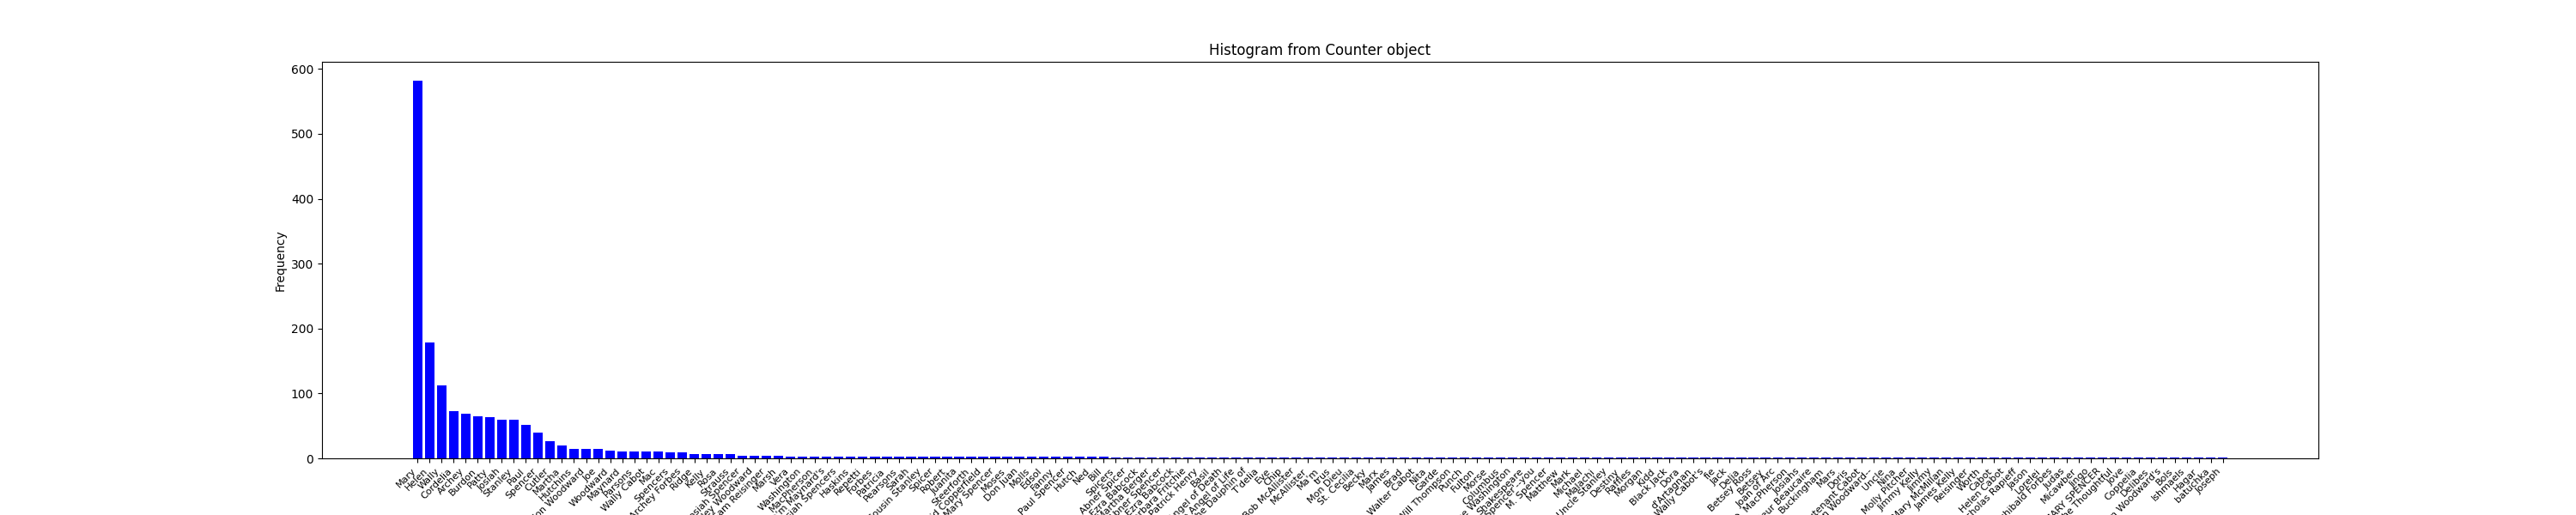

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.fon

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/ben/Projects/story-wrapper/venv/lib/python3.10/sit

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='condensed', size='scalable')) = 1.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-Bold.ttf', name='Sawasdee', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-Oblique.ttf', name='Sawasdee', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstPoster.ttf', name='KacstPoster', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Light.ttf', name='Rasa', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', name='Liberation Sans Narrow', style='normal', variant='normal', weight=400, stretch='condensed', size='scalable')) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-B.ttf', name='Ubuntu Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/u

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', name='Liberation Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', name='Liberation Mono', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/kacst/KacstNaskh.ttf', name='KacstNaskh', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/freefont/FreeSansBoldOblique.ttf', name='FreeSans', style='oblique', variant='normal', weight=600, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fn

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSansNarrow-Bold.otf', name='Nimbus Sans Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', name='Liberation Sans Narrow', style='italic', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Waree-BoldOblique.ttf', name='Waree', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationMono-Bold.ttf', name='Liberation Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manag

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-Bold.otf', name='Nimbus Roman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='condensed', size='scalable')) = 1.25
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ubuntu/UbuntuMono-BI.ttf', name='Ubuntu Mono', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-beng-extra/JamrulNormal.ttf', name='Jamrul', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-LightOblique.ttf', name='Umpush', style='oblique', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgTypewriter-Oblique.ttf', name='Tlwg Typewriter', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/malayalam/Manjari-Regular.otf', name='Manjari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ttf-khmeros-core/KhmerOS.ttf', name='Khmer OS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/t

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSans-Regular.otf', name='Nimbus Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', name='Liberation Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Laksaman-Bold.ttf', name='Laksaman', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/padauk/Padauk-Bold.ttf', name='Padauk', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/

In [19]:
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO)
%matplotlib notebook

# Sort by frequency
sorted_items = sorted(story.count_characters().items(), key=lambda x: x[1], reverse=True)

# Separate the keys (items) and values (frequencies)
labels, values = zip(*sorted_items)

# Create the histogram
plt.figure(figsize=(30, 6))
plt.bar(labels, values, color='blue')

# Add labels and title
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.title('Histogram from Counter object')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)

# Show the plot
plt.show()

In [7]:
for char in story.potential_characters.values():
    print(char)
    for o in char.occurrences:
        print(o)
        print(story.text[o.location_number])
        print("---")
    print("\n******\n")

<Character - ID: 8775923867417; name: 'abner spicer'; no. of occurrences: 3; first name: 'abner'; surname: 'spicer'; middle names: []; aliases: []>
<Occurrence - text index: 14; span: Abner Spicer>
"I wonder if Josiah--is too old--to marry again! Of course," she hurriedly added, "he is fifty-two--but it seems to me that one of the Spicers--I think it was Captain Abner Spicer--had children until he was sixty--although by a younger wife, of course."
---
<Occurrence - text index: 195; span: Spicer>
In looking up the genealogy of the Spicer family, Miss Patty discovered that a distant relative in Charleston had just died, leaving a daughter behind him--an orphan--who was a year older than Mary. Correspondence finally led Miss Patty to make the journey, and when she returned she brought with her a dark-eyed girl who might have been the very spirit of youthful romance.
---
<Occurrence - text index: 310; span: Spicer>
To college! A Spencer girl--or a Spicer--going to college! Miss Cordelia ga

In [8]:
story.get_main_characters()

[<Character - ID: 8775494038544; name: 'helen cabot'; no. of occurrences: 179; first name: 'helen'; surname: 'cabot'; middle names: []; aliases: []>,
 <Character - ID: 8775494030306; name: 'burdon woodward'; no. of occurrences: 81; first name: 'burdon'; surname: 'woodward'; middle names: []; aliases: []>,
 <Character - ID: 8775923867144; name: 'archey forbes'; no. of occurrences: 78; first name: 'archey'; surname: 'forbes'; middle names: []; aliases: []>,
 <Character - ID: 8775923867573; name: 'cordelia'; no. of occurrences: 73; first name: 'None'; surname: 'None'; middle names: []; aliases: []>,
 <Character - ID: 8775923867501; name: 'josiah spencer'; no. of occurrences: 67; first name: 'josiah'; surname: 'spencer'; middle names: []; aliases: []>,
 <Character - ID: 8775923867285; name: 'stanley woodward'; no. of occurrences: 63; first name: 'stanley'; surname: 'woodward'; middle names: []; aliases: []>,
 <Character - ID: 8775494038550; name: 'paul spencer'; no. of occurrences: 54; fir